In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 

In [2]:
data = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\train_data.csv")

In [9]:
data

,Attractions,Activities
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
6295,0,0
6296,0,0
6297,0,0
6298,0,0


In [4]:
Y = data['Accommodation'].values
print(Y)
data = data.drop('Accommodation',axis=1)
data = data.drop('Centre Latitude',axis=1)
data = data.drop('Centre Longitude',axis=1)

[0 0 0 ... 0 0 0]


In [11]:
X = data.values
y = Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=83)

In [16]:
model = Sequential()
feat = 2
model.add(Dense(feat,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse',  metrics=['accuracy'])

Train on 4221 samples, validate on 2079 samples
Epoch 1/100
4221/4221 [==============================] - 0s 87us/sample - loss: 4.2700 - accuracy: 0.7809 - val_loss: 2.1933 - val_accuracy: 0.7417
Epoch 2/100
4221/4221 [==============================] - 0s 81us/sample - loss: 4.1126 - accuracy: 0.7783 - val_loss: 2.2937 - val_accuracy: 0.7431
Epoch 3/100
4221/4221 [==============================] - 0s 90us/sample - loss: 4.1050 - accuracy: 0.7738 - val_loss: 2.5761 - val_accuracy: 0.7417
Epoch 4/100
4221/4221 [==============================] - 0s 107us/sample - loss: 4.0972 - accuracy: 0.7747 - val_loss: 2.5018 - val_accuracy: 0.7417
Epoch 5/100
4221/4221 [==============================] - 0s 115us/sample - loss: 4.1556 - accuracy: 0.7830 - val_loss: 3.0501 - val_accuracy: 0.7431
Epoch 6/100
4221/4221 [==============================] - 0s 102us/sample - loss: 4.0515 - accuracy: 0.7752 - val_loss: 2.4290 - val_accuracy: 0.7581
Epoch 7/100
4221/4221 [==============================] - 0s 9

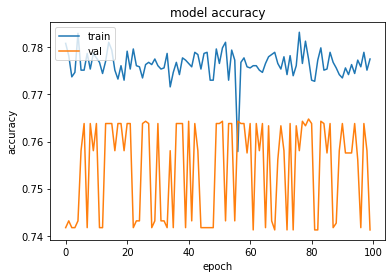

In [18]:
history = model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=32,epochs=100)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

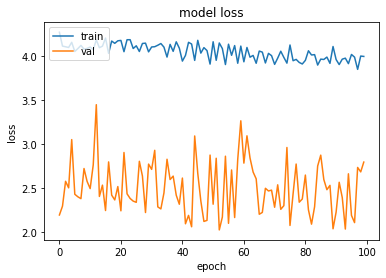

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [37]:
# evaluate the keras model
accuracy = model.evaluate(X_test, y_test)

2079/2079 [==============================] - 0s 54us/sample - loss: 2.7945 - accuracy: 0.7412


In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             multiple                  20        
_________________________________________________________________
dense_16 (Dense)             multiple                  320       
_________________________________________________________________
dense_17 (Dense)             multiple                  2080      
_________________________________________________________________
dense_18 (Dense)             multiple                  264       
_________________________________________________________________
dense_19 (Dense)             multiple                  9         
Total params: 2,693
Trainable params: 2,693
Non-trainable params: 0
_________________________________________________________________


In [13]:
loss_df = pd.DataFrame(model.history.history)
print(loss_df)

         loss  val_loss
0   21.389943  7.512532
1   17.718677  6.071815
2   13.105680  4.448307
3    7.706775  3.462333
4    5.091017  3.246867
..        ...       ...
95   2.497968  1.961097
96   2.618317  1.892480
97   2.553688  1.932836
98   2.652616  1.877881
99   2.593827  1.814470

[100 rows x 2 columns]


MSE: 2.7944981858799256
VarScore: 0.8457928436376777


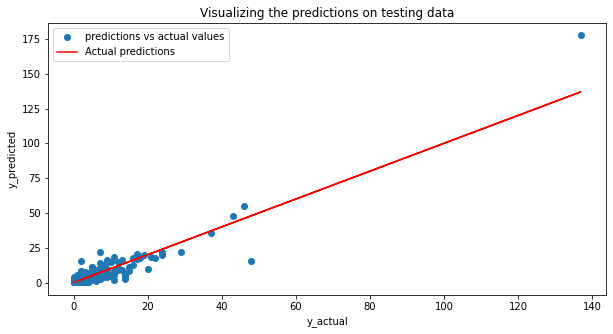

In [36]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

fig = plt.figure(figsize=(10,5))
plt.ylabel('y_predicted')
plt.xlabel('y_actual')
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.title('Visualizing the predictions on testing data')
plt.legend(['predictions vs actual values', 'Actual predictions'])
